**NAMA : NISA APRILIANA <br>**
**NIM : 211351102<br>**
**Kelas : PAGI A**

# Import Dataset Kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nisaapriliana","key":"1824533cf00a7268fc8ac557a0edc0ad"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets download -d cpluzshrijayan/milkquality

  0% 0.00/1.24k [00:00<?, ?B/s]
100% 1.24k/1.24k [00:00<00:00, 3.24MB/s]


In [5]:
!mkdir milkquality.zip
!unzip milkquality.zip -d milkquality
!ls milkquality

mkdir: cannot create directory ‘milkquality.zip’: File exists
Archive:  milkquality.zip
  inflating: milkquality/milknew.csv  
milknew.csv


# Import Library yang dibutuhkan

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [7]:
df = pd.read_csv('milkquality/milknew.csv')

# Data Discovery

In [8]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [9]:
df.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [10]:
df.columns = df.columns.str.strip()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [12]:
df.shape

(1059, 8)

In [13]:
df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [14]:
df['Grade'].value_counts()

low       429
medium    374
high      256
Name: Grade, dtype: int64

# Exploratoy Data Analys (EDA)

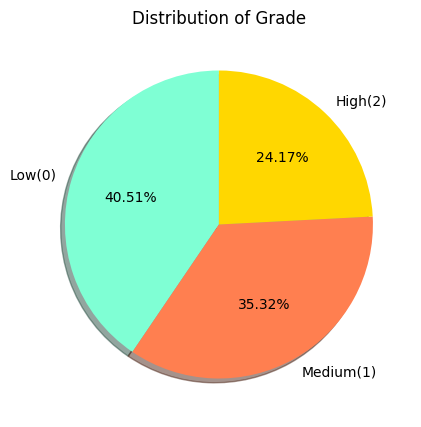

In [15]:
plt.figure(figsize=(5, 5))

plt.pie(df["Grade"].value_counts(),
        labels=['Low(0)','Medium(1)','High(2)'],
        autopct='%.2f%%',
        startangle=90,
        colors=['aquamarine','coral','gold'],
        shadow=True)
plt.title('Distribution of Grade')
plt.show()

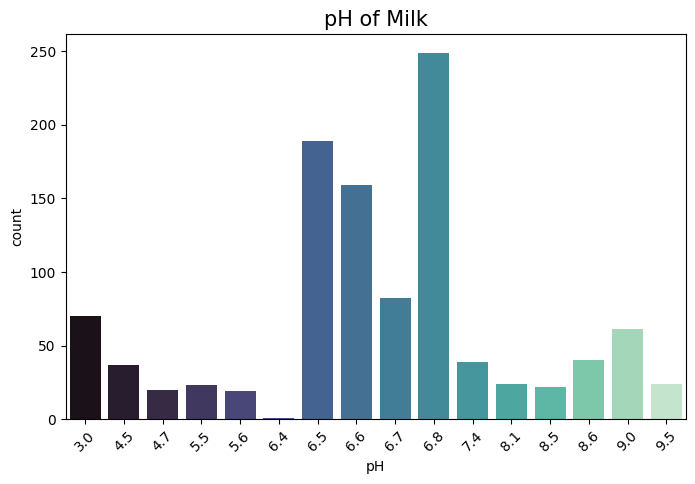

In [16]:
plt.figure(figsize=(8,5))
plt.title("pH of Milk",fontsize=15)
c1=sns.countplot(x='pH',data=df,palette="mako")
plt.xticks(rotation=45)
plt.show()

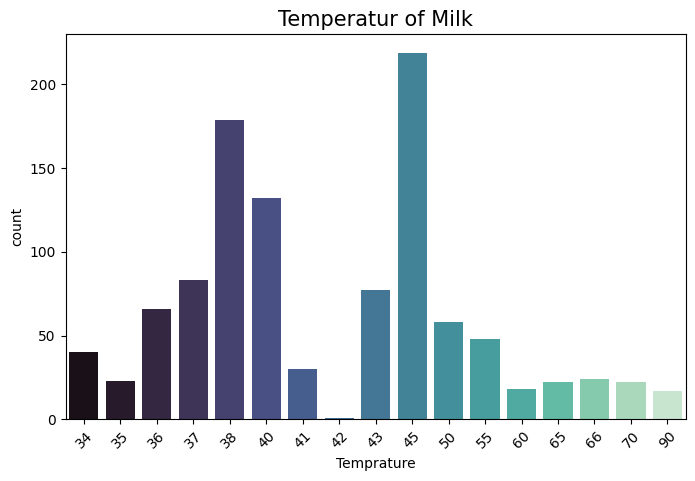

In [17]:
plt.figure(figsize=(8,5))
plt.title("Temperatur of Milk",fontsize=15)
c1=sns.countplot(x='Temprature',data=df,palette="mako")
plt.xticks(rotation=45)
plt.show()

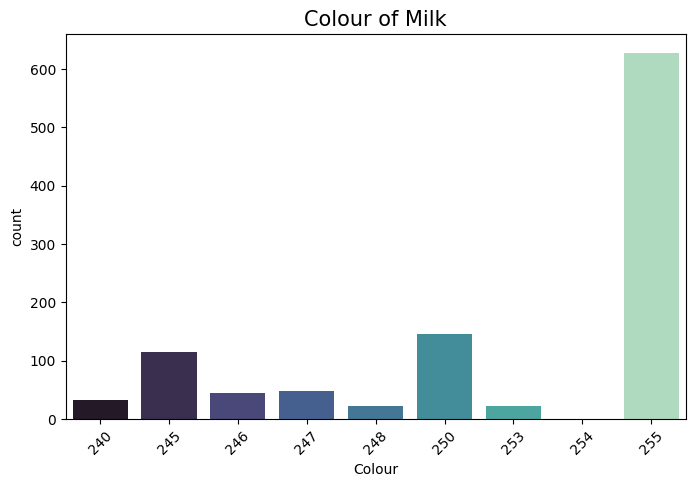

In [18]:
plt.figure(figsize=(8,5))
plt.title("Colour of Milk",fontsize=15)
c1=sns.countplot(x='Colour',data=df,palette="mako")
plt.xticks(rotation=45)
plt.show()

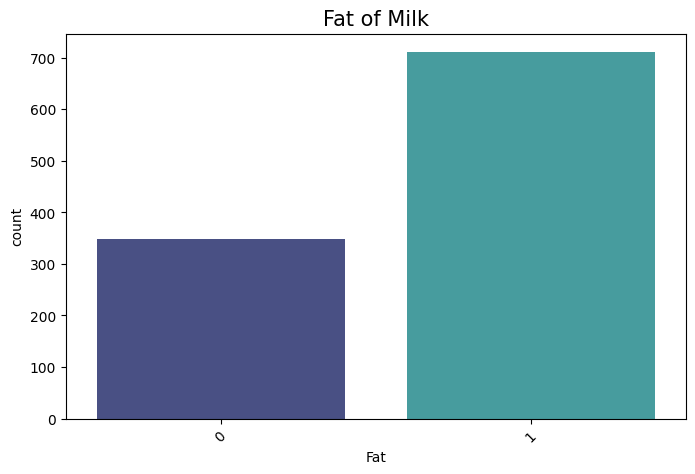

In [19]:
plt.figure(figsize=(8,5))
plt.title("Fat of Milk",fontsize=15)
c1=sns.countplot(x='Fat',data=df,palette="mako")
plt.xticks(rotation=45)
plt.show()

<ipython-input-20-1acf7e835c89>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


<Axes: >

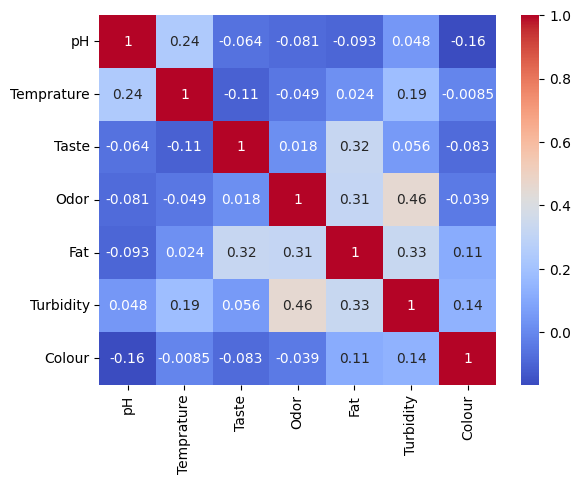

In [20]:
# melihat korelasi antar varibael
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Data Preparation

In [21]:
df['Grade']=df['Grade'].map({'low':0,'medium':1,'high':2})
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


In [22]:
df.to_csv('milk-quality.csv',index=False)

In [23]:
features=['pH','Temprature','Taste','Odor','Fat','Turbidity','Colour']
X=df[features]
y=df['Grade']

In [24]:
X.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255


In [25]:
y

0       2
1       2
2       0
3       0
4       1
       ..
1054    1
1055    2
1056    0
1057    2
1058    0
Name: Grade, Length: 1059, dtype: int64

# Modeling

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [27]:
knn = KNeighborsClassifier(n_neighbors=2)

In [28]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [29]:
y_pred=knn.predict(X_test)
score = knn.score(X_test, y_test)
print('akurasi model knn = ', score)

akurasi model knn =  0.9937106918238994


In [30]:
input_data = np.array([[6.6,36,0,1,0,1,253]])
prediction = knn.predict(input_data)
print('Estimasi Kualitas Susu :', prediction)

Estimasi Kualitas Susu : [2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# Visualisasi Hasil Model

[[114   1   0]
 [  0 126   1]
 [  0   0  76]]


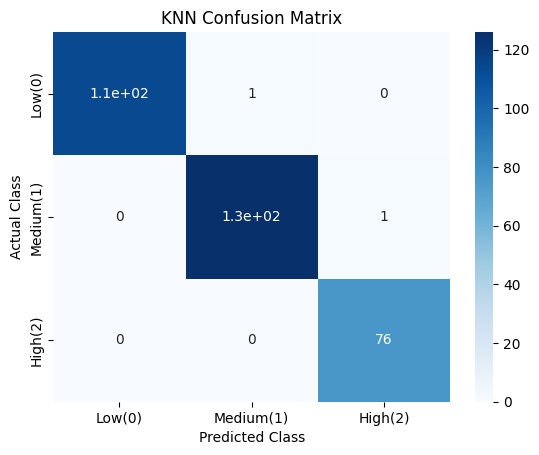

In [31]:
#KNN Confusion Matrix knn_cm
knn_cm = confusion_matrix(y_test, y_pred)
print(knn_cm)

sns.heatmap(knn_cm, annot = True,cmap = 'Blues',
            xticklabels = ['Low(0)', 'Medium(1)', 'High(2)'],
            yticklabels = ['Low(0)', 'Medium(1)', 'High(2)'])
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.title("KNN Confusion Matrix")
plt.show()

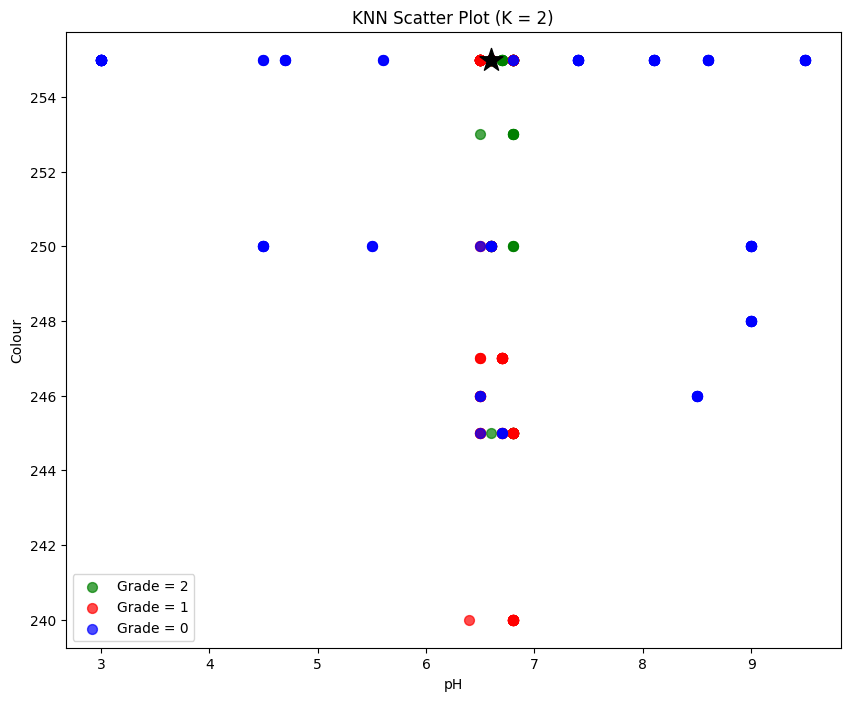

In [32]:

def knn_visualization(k, X_test, y_test, y_pred):
    plt.figure(figsize=(10, 8))

    # Menyiapkan nilai prediksi yang benar dan salah
    correct_pred = (y_pred == y_test)
    wrong_pred = (y_pred != y_test)

    # Plot scatter untuk kelas Grade = 2
    plt.scatter(X_test[y_test == 2]['pH'], X_test[y_test == 2]['Colour'], color='green', label='Grade = 2', alpha=0.7, s=50)

    # Plot scatter untuk kelas Grade = 1
    plt.scatter(X_test[y_test == 1]['pH'], X_test[y_test == 1]['Colour'], color='red', label='Grade = 1', alpha=0.7, s=50)

    # Plot scatter untuk kelas Grade = 0
    plt.scatter(X_test[y_test == 0]['pH'], X_test[y_test == 0]['Colour'], color='blue', label='Grade = 0', alpha=0.7, s=50)


    plt.xlabel('pH')
    plt.ylabel('Colour')
    plt.title(f'KNN Scatter Plot (K = {k})')
    plt.legend()

    # Tambahkan bintang di titik pertama dari X_test
    plt.scatter(x=X_test.iloc[0]['pH'], y=X_test.iloc[0]['Colour'], color='black', s=300, marker='*')

    plt.show()

# Menggunakan fungsi visualisasi KNN dengan nilai k = 2 dan menambahkan bintang di titik pertama dari X_test
k_value = 2
knn_visualization(k_value, X_test, y_test, y_pred)


# Save Model (Pickle)

In [33]:
import pickle
filename ='estimasi_milkquality.sav'
pickle.dump(knn,open(filename,'wb'))